## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import learning_curve

from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import joblib

## Data Loading

In [2]:
dataset = pd.read_excel("data/dataset.xlsx")
dataset

,id_review,review,attractions,attractions_text,amenities,amenities_text,access,access_text,price,price_text,no_aspect,no_aspect_text
0,ChdDSUhNMG9nS0VJQ0FnSUQ1c3E2b3hBRRAB,Hari ini akhirnya kesampaian ke Sanur lagi han...,negative,Sayangnya cukup sedih karena pantai ini agak k...,none,"Pantai ini terdapat area bermain anak, ada ked...",none,NaN,positive,"Saya parkir disana, gratis.",none,NaN
1,ChdDSUhNMG9nS0VJQ0FnSUQ1c3E2b3hBRRAB,Hari ini akhirnya kesampaian ke Sanur lagi han...,negative,Sayangnya cukup sedih karena pantai ini agak k...,positive,"Pantai ini terdapat area bermain anak, ada ked...",none,NaN,positive,"Saya parkir disana, gratis",none,NaN
2,ChdDSUhNMG9nS0VJQ0FnSUQ1c3E2b3hBRRAB,Hari ini akhirnya kesampaian ke Sanur lagi han...,negative,Sayangnya cukup sedih karena pantai ini agak k...,positive,"Pantai ini terdapat area bermain anak, ada ked...",none,NaN,none,NaN,none,NaN
3,ChdDSUhNMG9nS0VJQ0FnSUM1OHQ3VXFRRRAB,Pantai Sanur.. melihat sunrise disini.. sayang...,negative,Pantai Sanur.. melihat sunrise disini.. sayang...,none,NaN,none,NaN,none,NaN,none,NaN
4,ChdDSUhNMG9nS0VJQ0FnSUM1OHQ3VXFRRRAB,Pantai Sanur.. melihat sunrise disini.. sayang...,positive,Pantai Sanur. melihat sunrise disini. sayang p...,none,NaN,none,NaN,none,NaN,none,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11786,6Pn8gb3UL4Sc2lq6Mm6Ko9MT0yD7OB,Ini adalah tidak benar-benar sebuah pantai di ...,positive,jadi ini adalah tempat yang bagus untuk orang-...,positive,Wilayah yang telah direklamasi; Tetapi pilihan...,none,NaN,none,NaN,neutral,Ini adalah tidak benar-benar sebuah pantai di ...
11787,6Pn8gb3UL4Sc2lq6Mm6Ko9MT0yD7OB,Ini adalah tidak benar-benar sebuah pantai di ...,positive,jadi ini adalah tempat yang bagus untuk orang-...,neutral,Pantai untuk tinggal di sore hari ketika sebag...,none,NaN,none,NaN,neutral,Ini adalah tidak benar-benar sebuah pantai di ...
11788,4WO8Se4vQ5Xf7on5pZ6gf6XL5Gh3qS,Sebenarnya tidak ada yang istimewa dengan pant...,neutral,Sebenarnya tidak ada yang istimewa dengan pant...,neutral,Lokasi ini nyaman dinikmati pada pagi hari seb...,neutral,Pada siang hari cuaca akan sangat panas dan te...,none,NaN,none,NaN
11789,4WO8Se4vQ5Xf7on5pZ6gf6XL5Gh3qS,Sebenarnya tidak ada yang istimewa dengan pant...,positive,.Lokasi ini nyaman dinikmati pada pagi hari se...,none,NaN,none,NaN,none,NaN,neutral,Sebenarnya tidak ada yang istimewa dengan pant...


### Dataset Information

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11791 entries, 0 to 11790
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_review         11791 non-null  object
 1   review            11788 non-null  object
 2   attractions       11728 non-null  object
 3   attractions_text  8755 non-null   object
 4   amenities         11728 non-null  object
 5   amenities_text    4442 non-null   object
 6   access            11728 non-null  object
 7   access_text       1070 non-null   object
 8   price             11728 non-null  object
 9   price_text        782 non-null    object
 10  no_aspect         11728 non-null  object
 11  no_aspect_text    3659 non-null   object
dtypes: object(12)
memory usage: 1.1+ MB


## Data Wrangling

### Data Assessing

#### Pengecekan Review Duplikat

In [4]:
print(f"Jumlah Duplikasi Data: {dataset.duplicated().sum()}")

Jumlah Duplikasi Data: 1984


### Data Cleaning

#### Penghapusan Review Duplikat

In [5]:
dataset.drop_duplicates(inplace=True)

In [6]:
print(f"Jumlah Duplikasi Data: {dataset.duplicated().sum()}")

Jumlah Duplikasi Data: 0


### Pemisahan Review Menurut Aspek

#### Attractions

In [7]:
attractions = dataset[["attractions_text", "attractions"]]
attractions.columns = ["text", "label"]
attractions = attractions[attractions["label"].str.lower() != "none"]
attractions = attractions.dropna()

attractions

,text,label
0,Sayangnya cukup sedih karena pantai ini agak k...,negative
1,Sayangnya cukup sedih karena pantai ini agak k...,negative
2,Sayangnya cukup sedih karena pantai ini agak k...,negative
3,Pantai Sanur.. melihat sunrise disini.. sayang...,negative
4,Pantai Sanur. melihat sunrise disini. sayang p...,positive
...,...,...
11786,jadi ini adalah tempat yang bagus untuk orang-...,positive
11787,jadi ini adalah tempat yang bagus untuk orang-...,positive
11788,Sebenarnya tidak ada yang istimewa dengan pant...,neutral
11789,.Lokasi ini nyaman dinikmati pada pagi hari se...,positive


#### Amenities

In [8]:
amenities = dataset[["amenities_text", "amenities"]]
amenities.columns = ["text", "label"]
amenities = amenities[amenities["label"].str.lower() != "none"]
amenities = amenities.dropna()

amenities

,text,label
1,"Pantai ini terdapat area bermain anak, ada ked...",positive
2,"Pantai ini terdapat area bermain anak, ada ked...",positive
9,"Joging track nya bagus, jadi bisa untuk sekali...",positive
10,Tersedia juga fasilitas sewaan sepeda; ersedia...,positive
11,Tersedia juga fasilitas sewaan sepeda; Tersedi...,positive
...,...,...
11785,Wilayah yang telah direklamasi. Pantai untuk ...,neutral
11786,Wilayah yang telah direklamasi; Tetapi pilihan...,positive
11787,Pantai untuk tinggal di sore hari ketika sebag...,neutral
11788,Lokasi ini nyaman dinikmati pada pagi hari seb...,neutral


#### Access

In [9]:
access = dataset[["access_text", "access"]]
access.columns = ["text", "label"]
access = access[access["label"].str.lower() != "none"]
access = access.dropna()

access

,text,label
12,Akses masuk belom bersih karena lagi dibangun ...,negative
55,Pantai Sanur adalah pantai wisata yang terleta...,positive
65,Pantainya bagus tapi dekat hotel saya menginap...,positive
87,Akses masuk ok.,positive
88,Akses masuk ok,positive
...,...,...
11766,Lokasi yang mudah dijangkau serta bersih menja...,positive
11773,engaja datang ke pantai Losari di sore hari bi...,neutral
11782,Pantai ini menyusuri jalan utama pusat kota Ma...,neutral
11783,"Pantai yang jauh dari keramaian kota, seperti ...",neutral


#### Price

In [10]:
price = dataset[["price_text", "price"]]
price.columns = ["text", "label"]
price = price[price["label"].str.lower() != "none"]
price = price.dropna()

price

,text,label
0,"Saya parkir disana, gratis.",positive
1,"Saya parkir disana, gratis",positive
6,Di depan gate ada sate babi enak dan murah 20r...,positive
7,Di depan gate ada sate babi enak dan murah 20r...,positive
8,Di depan gate ada sate babi enak dan murah 20r...,positive
...,...,...
11585,"Kalau mau menikmati ikan bakar, harus berpinda...",negative
11606,Apalagi pada hari minggu pagi selain jadi temp...,positive
11747,"Pemandangan laut indah, nyaman dekat laut, Mas...",positive
11767,Dan di sekitar pantai banyak pilihan menu jaja...,positive


#### No Aspect

In [11]:
no_aspect = dataset[["no_aspect_text", "no_aspect"]]
no_aspect.columns = ["text", "label"]
no_aspect = no_aspect[no_aspect["label"].str.lower() != "none"]
no_aspect = no_aspect.dropna()

no_aspect

,text,label
16,"Nyaman untuk jogging, jalan bebas dari kendara...",neutral
19,Ngajak bule ngobrol2 eh nyambung aja. Suamiku ...,neutral
20,Ngajak bule ngobrol2 eh nyambung aja. Suamiku ...,positive
25,Selalu betah liat sunrise disini Penuh memori,neutral
32,"Cuma hati"""" bagi yg punya helm. Waktu itu ada ...",negative
...,...,...
11784,Pantai ini menyusuri jalan utama pusat kota Ma...,neutral
11785,Tempat ini masih layak untuk dikunjungi karena...,neutral
11786,Ini adalah tidak benar-benar sebuah pantai di ...,neutral
11787,Ini adalah tidak benar-benar sebuah pantai di ...,neutral


### Text Preprocessing

In [12]:
def cleaning_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefolding_text(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizing_text(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filtering_text(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('english'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def to_sentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [13]:
def clean_dataframe(clean_df):
    clean_df['text_clean'] = clean_df['text'].apply(cleaning_text)

    # Mengubah huruf dalam teks menjadi huruf kecil
    clean_df['text_casefolding'] = clean_df['text_clean'].apply(casefolding_text)

    # Memecah teks menjadi token (kata-kata)
    clean_df['text_tokenizing'] = clean_df['text_casefolding'].apply(tokenizing_text)

    # Menghapus kata-kata stop (kata-kata umum)
    clean_df['text_stopword'] = clean_df['text_tokenizing'].apply(filtering_text)

    # Menggabungkan token-token menjadi kalimat
    clean_df['final_text'] = clean_df['text_stopword'].apply(to_sentence)

    return clean_df

In [14]:
clean_attractions = clean_dataframe(attractions.copy())
clean_amenities = clean_dataframe(amenities.copy())
clean_access = clean_dataframe(access.copy())
clean_price = clean_dataframe(price.copy())
clean_no_aspect = clean_dataframe(no_aspect.copy())

### Encoding Label Menjadi Kode

In [15]:
label = {
    "negative": 0,
    "neutral": 1,
    "positive": 2
}

clean_attractions["label"] = clean_attractions["label"].map(label)
clean_amenities["label"] = clean_amenities["label"].map(label)
clean_access["label"] = clean_access["label"].map(label)
clean_price["label"] = clean_price["label"].map(label)
clean_no_aspect["label"] = clean_no_aspect["label"].map(label)

### Pengecekan Distribusi Label

In [16]:
distributions = {
    "attractions": clean_attractions["label"].value_counts(),
    "amenities": clean_amenities["label"].value_counts(),
    "access": clean_access["label"].value_counts(),
    "price": clean_price["label"].value_counts(),
    "no_aspect": clean_no_aspect["label"].value_counts(),
}

df_distribution = pd.DataFrame(distributions).fillna(0).astype(int)
print(df_distribution)

       attractions  amenities  access  price  no_aspect
label                                                  
0              882        765     123     93        247
1              774        638     187    103       1640
2             5372       2674     692    527       1224


**Insight:**  
Berdasarkan grafik di atas, setiap label tidak memiliki distribusi yang merata. Review lebih banyak memiliki label positif dan review netral memiliki jumlah yang sangat sedikit. Oleh karena itu, terjadi data imbalance pada dataset dan harus ditangani agar menghasilkan model yang baik.

## Feature Extraction

In [17]:
X_attractions = clean_attractions["final_text"]
Y_attractions = clean_attractions["label"]

X_amenities = clean_amenities["final_text"]
Y_amenities = clean_amenities["label"]

X_access = clean_access["final_text"]
Y_access = clean_access["label"]

X_price = clean_price["final_text"]
Y_price = clean_price["label"]

X_no_aspect = clean_no_aspect["final_text"]
Y_no_aspect = clean_no_aspect["label"]

### Feature Extraction dengan TF-IDF

#### Attractions

In [18]:
tfidf_attractions = TfidfVectorizer()
X_attractions_tfidf = tfidf_attractions.fit_transform(X_attractions)

# Konversi hasil ekstraksi fitur menjadi dataframe
tfidf_attractions_df = pd.DataFrame(X_attractions_tfidf.toarray(), columns=tfidf_attractions.get_feature_names_out())

In [19]:
# Simpan model TF-IDF
joblib.dump(tfidf_attractions, 'models/tfidf_attractions.pkl')

['models/tfidf_attractions.pkl']

#### Amenities

In [20]:
tfidf_amenities = TfidfVectorizer()
X_amenities_tfidf = tfidf_amenities.fit_transform(X_amenities)

# Konversi hasil ekstraksi fitur menjadi dataframe
tfidf_amenities_df = pd.DataFrame(X_amenities_tfidf.toarray(), columns=tfidf_amenities.get_feature_names_out())

In [21]:
# Simpan model TF-IDF
joblib.dump(tfidf_amenities, 'models/tfidf_amenities.pkl')

['models/tfidf_amenities.pkl']

#### Access

In [22]:
tfidf_access = TfidfVectorizer()
X_access_tfidf = tfidf_access.fit_transform(X_access)

# Konversi hasil ekstraksi fitur menjadi dataframe
tfidf_access_df = pd.DataFrame(X_access_tfidf.toarray(), columns=tfidf_access.get_feature_names_out())

In [23]:
# Simpan model TF-IDF
joblib.dump(tfidf_access, 'models/tfidf_access.pkl')

['models/tfidf_access.pkl']

#### Price

In [24]:
tfidf_price = TfidfVectorizer()
X_price_tfidf = tfidf_price.fit_transform(X_price)

# Konversi hasil ekstraksi fitur menjadi dataframe
tfidf_price_df = pd.DataFrame(X_price_tfidf.toarray(), columns=tfidf_price.get_feature_names_out())

In [25]:
# Simpan model TF-IDF
joblib.dump(tfidf_price, 'models/tfidf_price.pkl')

['models/tfidf_price.pkl']

#### No Aspect

In [26]:
tfidf_no_aspect = TfidfVectorizer()
X_no_aspect_tfidf = tfidf_no_aspect.fit_transform(X_no_aspect)

# Konversi hasil ekstraksi fitur menjadi dataframe
tfidf_no_aspect_df = pd.DataFrame(X_no_aspect_tfidf.toarray(), columns=tfidf_no_aspect.get_feature_names_out())

In [27]:
# Simpan model TF-IDF
joblib.dump(tfidf_no_aspect, 'models/tfidf_no_aspect.pkl')

['models/tfidf_no_aspect.pkl']

#### Penerapan SMOTE
Karena distribusi label pada data awal tidak seimbang, dilakukan SMOTE pada dataset untuk memastikan keseimbangan distribusi label pada dataset dan menghasilkan model yang baik.

#### Attractions

In [28]:
smote_attractions = SMOTE(random_state=42)

X_attractions_resampled, Y_attractions_resampled = smote_attractions.fit_resample(X_attractions_tfidf, Y_attractions)

# Menampilkan distribusi kelas setelah SMOTE
attractions_resampled = pd.Series(Y_attractions_resampled).value_counts().reset_index()
attractions_resampled

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


,label,count
0,0,5372
1,2,5372
2,1,5372


#### Amenities

In [29]:
smote_amenities = SMOTE(random_state=42)

X_amenities_resampled, Y_amenities_resampled = smote_amenities.fit_resample(X_amenities_tfidf, Y_amenities)

# Menampilkan distribusi kelas setelah SMOTE
amenities_resampled = pd.Series(Y_amenities_resampled).value_counts().reset_index()
amenities_resampled

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


,label,count
0,2,2674
1,0,2674
2,1,2674


#### Access

In [30]:
smote_access = SMOTE(random_state=42)

X_access_resampled, Y_access_resampled = smote_access.fit_resample(X_access_tfidf, Y_access)

# Menampilkan distribusi kelas setelah SMOTE
access_resampled = pd.Series(Y_access_resampled).value_counts().reset_index()
access_resampled

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


,label,count
0,0,692
1,2,692
2,1,692


#### Price

In [31]:
smote_price = SMOTE(random_state=42)

X_price_resampled, Y_price_resampled = smote_price.fit_resample(X_price_tfidf, Y_price)

# Menampilkan distribusi kelas setelah SMOTE
price_resampled = pd.Series(Y_price_resampled).value_counts().reset_index()
price_resampled

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


,label,count
0,2,527
1,1,527
2,0,527


#### No Aspect

In [32]:
smote_no_aspect = SMOTE(random_state=42)

X_no_aspect_resampled, Y_no_aspect_resampled = smote_no_aspect.fit_resample(X_no_aspect_tfidf, Y_no_aspect)

# Menampilkan distribusi kelas setelah SMOTE
no_aspect_resampled = pd.Series(Y_no_aspect_resampled).value_counts().reset_index()
no_aspect_resampled

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


,label,count
0,1,1640
1,2,1640
2,0,1640


## Data Splitting

In [33]:
X_attractions_train, X_attractions_test, Y_attractions_train, Y_attractions_test = train_test_split(X_attractions_resampled, Y_attractions_resampled, test_size=0.2, random_state=42)

X_amenities_train, X_amenities_test, Y_amenities_train, Y_amenities_test = train_test_split(X_amenities_resampled, Y_amenities_resampled, test_size=0.2, random_state=42)

X_access_train, X_access_test, Y_access_train, Y_access_test = train_test_split(X_access_resampled, Y_access_resampled, test_size=0.2, random_state=42)

X_price_train, X_price_test, Y_price_train, Y_price_test = train_test_split(X_price_resampled, Y_price_resampled, test_size=0.2, random_state=42)

X_no_aspect_train, X_no_aspect_test, Y_no_aspect_train, Y_no_aspect_test = train_test_split(X_no_aspect_resampled, Y_no_aspect_resampled, test_size=0.2, random_state=42)

## Modelling

### Random Forest 80/20

#### Attractions

In [34]:
# Membuat objek model Random Forest
random_forest_attractions = RandomForestClassifier(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    random_forest_attractions,
    X_attractions_train,
    Y_attractions_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

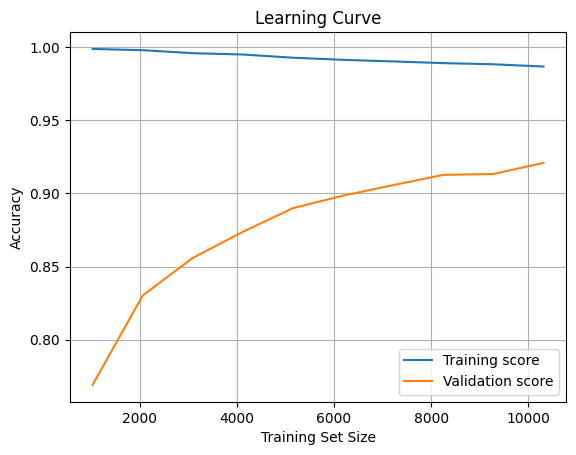

In [35]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
random_forest_attractions.fit(X_attractions_train, Y_attractions_train)

RandomForestClassifier(random_state=42)

In [37]:
# Simpan model
joblib.dump(random_forest_attractions, "models/random_forest_attractions.joblib")

['models/random_forest_attractions.joblib']

#### Amenities

In [38]:
# Membuat objek model Random Forest
random_forest_amenities = RandomForestClassifier(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    random_forest_amenities,
    X_amenities_train,
    Y_amenities_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

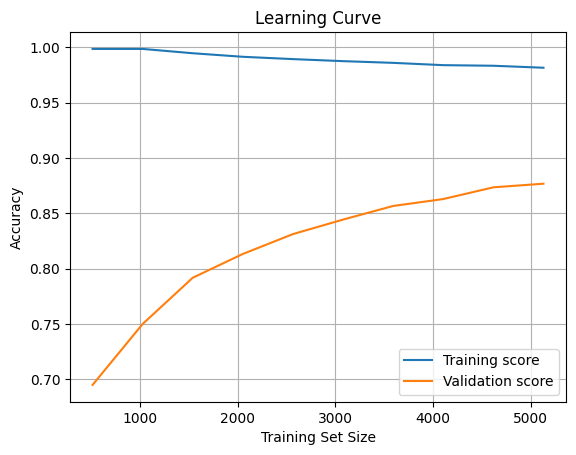

In [39]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
random_forest_amenities.fit(X_amenities_train, Y_amenities_train)

RandomForestClassifier(random_state=42)

In [41]:
# Simpan model
joblib.dump(random_forest_amenities, "models/random_forest_amenities.joblib")

['models/random_forest_amenities.joblib']

#### Access

In [42]:
# Membuat objek model Random Forest
random_forest_access = RandomForestClassifier(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    random_forest_access,
    X_access_train,
    Y_access_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

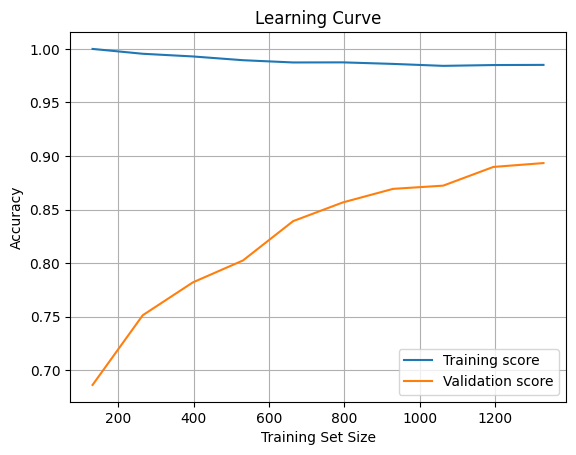

In [43]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
random_forest_access.fit(X_access_train, Y_access_train)

RandomForestClassifier(random_state=42)

In [45]:
# Simpan model
joblib.dump(random_forest_access, "models/random_forest_access.joblib")

['models/random_forest_access.joblib']

#### Price

In [46]:
# Membuat objek model Random Forest
random_forest_price = RandomForestClassifier(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    random_forest_price,
    X_price_train,
    Y_price_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

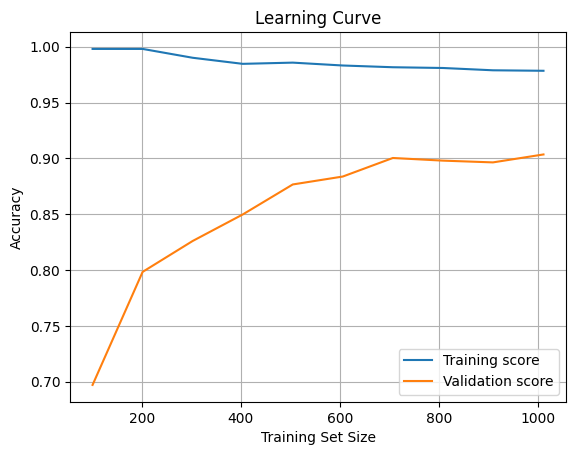

In [47]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
random_forest_price.fit(X_price_train, Y_price_train)

RandomForestClassifier(random_state=42)

In [49]:
# Simpan model
joblib.dump(random_forest_price, "models/random_forest_price.joblib")

['models/random_forest_price.joblib']

#### No Aspect

In [50]:
# Membuat objek model Random Forest
random_forest_no_aspect = RandomForestClassifier(random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    random_forest_no_aspect,
    X_no_aspect_train,
    Y_no_aspect_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

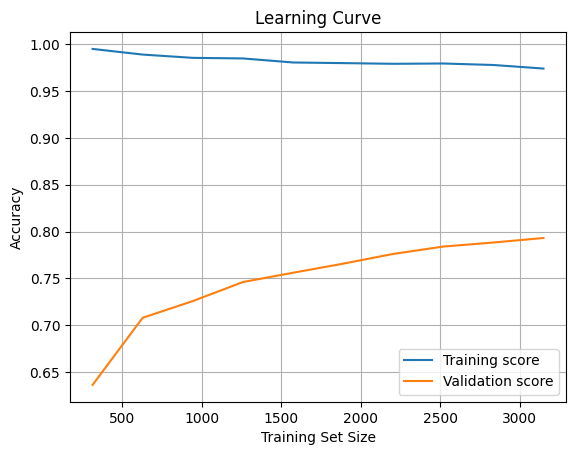

In [51]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
random_forest_no_aspect.fit(X_no_aspect_train, Y_no_aspect_train)

RandomForestClassifier(random_state=42)

In [53]:
# Simpan model
joblib.dump(random_forest_no_aspect, "models/random_forest_no_aspect.joblib")

['models/random_forest_no_aspect.joblib']

#### Evaluasi Model

In [54]:
y_pred_attractions_train_rf = random_forest_attractions.predict(X_attractions_train.toarray())
y_pred_attractions_test_rf = random_forest_attractions.predict(X_attractions_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_attractions_train_rf = accuracy_score(y_pred_attractions_train_rf, Y_attractions_train)
accuracy_attractions_test_rf = accuracy_score(y_pred_attractions_test_rf, Y_attractions_test)

# Menampilkan akurasi
print(f"Random Forest 1 - Train Accuracy:, {accuracy_attractions_train_rf:.4f}")
print(f"Random Forest 1 - Test Accuracy:, {accuracy_attractions_test_rf:.4f}")

Random Forest 1 - Train Accuracy:, 0.9843
Random Forest 1 - Test Accuracy:, 0.9333


### Neural Network

#### Pembuatan Arsitektur Model Neural Network

In [80]:
model_attractions = Sequential([
    Dense(128, activation='relu', input_shape=(X_attractions_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_attractions.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Attractions

##### Konfigurasi untuk Menyimpan Checkpoint Model Terbaik

In [81]:
checkpoint = ModelCheckpoint(
    'models/nn_attractions.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

##### Model Training

In [82]:
Y_attractions_train_cat = to_categorical(Y_attractions_train)
Y_attractions_test_cat = to_categorical(Y_attractions_test)

hist = model_attractions.fit(X_attractions_train, Y_attractions_train_cat, epochs=20, validation_data=(X_attractions_test, Y_attractions_test_cat), callbacks=[checkpoint])

Epoch 1/20
394/403 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6991 - loss: 0.6902
Epoch 1: val_accuracy improved from -inf to 0.91253, saving model to models/nn_attractions.h5


403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7021 - loss: 0.6845 - val_accuracy: 0.9125 - val_loss: 0.2405
Epoch 2/20
395/403 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9395 - loss: 0.1786
Epoch 2: val_accuracy improved from 0.91253 to 0.92649, saving model to models/nn_attractions.h5


403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9395 - loss: 0.1786 - val_accuracy: 0.9265 - val_loss: 0.2048
Epoch 3/20
395/403 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9528 - loss: 0.1269
Epoch 3: val_accuracy improved from 0.92649 to 0.93331, saving model to models/nn_attractions.h5


403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9528 - loss: 0.1271 - val_accuracy: 0.9333 - val_loss: 0.2026
Epoch 4/20
398/403 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9590 - loss: 0.1108
Epoch 4: val_accuracy did not improve from 0.93331
403/403 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9590 - loss: 0.1108 - val_accuracy: 0.9308 - val_loss: 0.2257
Epoch 5/20
398/403 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9630 - loss: 0.0943
Epoch 5: val_accuracy improved from 0.93331 to 0.93517, saving model to models/nn_attractions.h5


403/403 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9630 - loss: 0.0943 - val_accuracy: 0.9352 - val_loss: 0.2264
Epoch 6/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9637 - loss: 0.0850
Epoch 6: val_accuracy did not improve from 0.93517
403/403 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9637 - loss: 0.0850 - val_accuracy: 0.9339 - val_loss: 0.2326
Epoch 7/20
395/403 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9699 - loss: 0.0748
Epoch 7: val_accuracy improved from 0.93517 to 0.93579, saving model to models/nn_attractions.h5


403/403 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9698 - loss: 0.0750 - val_accuracy: 0.9358 - val_loss: 0.2542
Epoch 8/20
399/403 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9693 - loss: 0.0765
Epoch 8: val_accuracy improved from 0.93579 to 0.93921, saving model to models/nn_attractions.h5


403/403 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9693 - loss: 0.0765 - val_accuracy: 0.9392 - val_loss: 0.2368
Epoch 9/20
399/403 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9689 - loss: 0.0729
Epoch 9: val_accuracy did not improve from 0.93921
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9689 - loss: 0.0729 - val_accuracy: 0.9333 - val_loss: 0.2703
Epoch 10/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9697 - loss: 0.0690
Epoch 10: val_accuracy did not improve from 0.93921
403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9697 - loss: 0.0691 - val_accuracy: 0.9339 - val_loss: 0.2606
Epoch 11/20
400/403 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9668 - loss: 0.0728
Epoch 11: val_accuracy did not improve from 0.93921
403/403 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9668 - loss: 0.0728 - val_accuracy: 0.9339 - val_loss: 0.3201
Epoch 12/20
402/403 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9712 - loss: 0.0652
Epoch 12: val_accuracy did no

##### Learning Curve

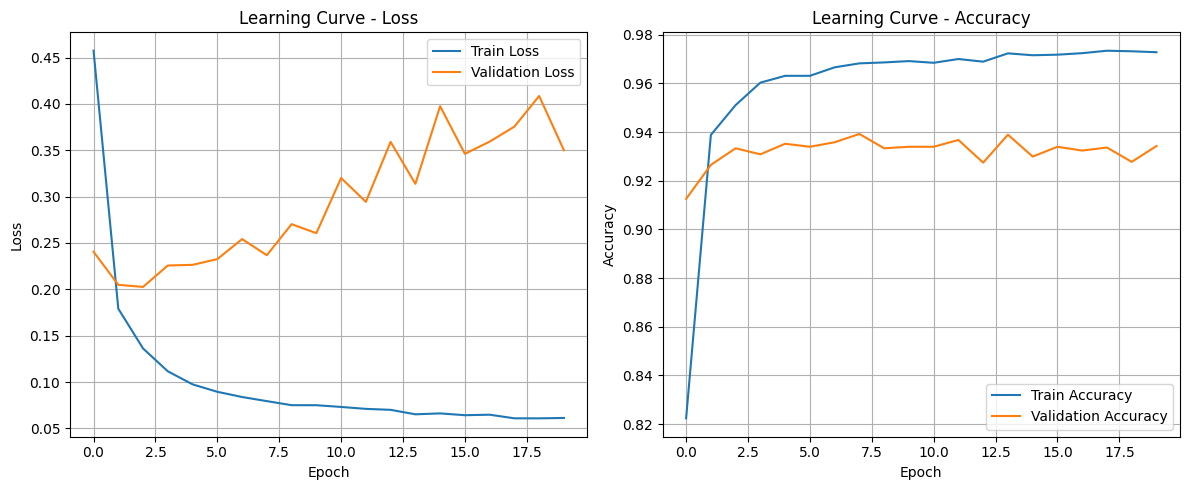

In [83]:
# Ambil history
history = hist.history

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##### Evaluasi Model

In [84]:
best_model = load_model("models/nn_attractions.h5")

y_pred_train_nn = best_model.predict(X_attractions_train)
y_pred_test_nn = best_model.predict(X_attractions_test)

# Konversi prediksi dari probabilitas ke label kelas
y_pred_train_labels = np.argmax(y_pred_train_nn, axis=1)
y_pred_test_labels = np.argmax(y_pred_test_nn, axis=1)

# Konversi label asli dari one-hot ke label kelas
Y_train_labels = np.argmax(Y_attractions_train_cat, axis=1)
Y_test_labels = np.argmax(Y_attractions_test_cat, axis=1)

# Hitung akurasi
accuracy_train_attractions_nn = accuracy_score(Y_train_labels, y_pred_train_labels)
accuracy_test_attractions_nn = accuracy_score(Y_test_labels, y_pred_test_labels)

403/403 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [85]:
# Tampilkan akurasi
print(f"Neural Network - Train Accuracy: {accuracy_train_attractions_nn:.4f}")
print(f"Neural Network - Test Accuracy: {accuracy_test_attractions_nn:.4f}")

Neural Network - Train Accuracy: 0.9721
Neural Network - Test Accuracy: 0.9392


#### Amenities

In [86]:
model_amenities = Sequential([
    Dense(128, activation='relu', input_shape=(X_amenities_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_amenities.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Konfigurasi untuk Menyimpan Checkpoint Model Terbaik

In [87]:
checkpoint = ModelCheckpoint(
    'models/nn_amenities.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

##### Model Training

In [88]:
Y_amenities_train_cat = to_categorical(Y_amenities_train)
Y_amenities_test_cat = to_categorical(Y_amenities_test)

hist = model_amenities.fit(X_amenities_train, Y_amenities_train_cat, epochs=20, validation_data=(X_amenities_test, Y_amenities_test_cat), callbacks=[checkpoint])

Epoch 1/20
193/201 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5958 - loss: 0.8878
Epoch 1: val_accuracy improved from -inf to 0.85794, saving model to models/nn_amenities.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6015 - loss: 0.8775 - val_accuracy: 0.8579 - val_loss: 0.3733
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9154 - loss: 0.2445
Epoch 2: val_accuracy improved from 0.85794 to 0.88224, saving model to models/nn_amenities.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9154 - loss: 0.2445 - val_accuracy: 0.8822 - val_loss: 0.2967
Epoch 3/20
200/201 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9398 - loss: 0.1660
Epoch 3: val_accuracy improved from 0.88224 to 0.89159, saving model to models/nn_amenities.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9398 - loss: 0.1661 - val_accuracy: 0.8916 - val_loss: 0.3107
Epoch 4/20
196/201 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9474 - loss: 0.1388
Epoch 4: val_accuracy improved from 0.89159 to 0.90218, saving model to models/nn_amenities.h5


201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9473 - loss: 0.1391 - val_accuracy: 0.9022 - val_loss: 0.2955
Epoch 5/20
192/201 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9546 - loss: 0.1225
Epoch 5: val_accuracy did not improve from 0.90218
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9543 - loss: 0.1229 - val_accuracy: 0.9022 - val_loss: 0.3286
Epoch 6/20
193/201 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9570 - loss: 0.1064
Epoch 6: val_accuracy did not improve from 0.90218
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9568 - loss: 0.1069 - val_accuracy: 0.8960 - val_loss: 0.3380
Epoch 7/20
200/201 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9564 - loss: 0.1048
Epoch 7: val_accuracy did not improve from 0.90218
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9564 - loss: 0.1049 - val_accuracy: 0.8978 - val_loss: 0.3222
Epoch 8/20
195/201 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9539 - loss: 0.0983
Epoch 8: val_accuracy improved from

201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9539 - loss: 0.0984 - val_accuracy: 0.9084 - val_loss: 0.3363
Epoch 9/20
188/201 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9586 - loss: 0.0936
Epoch 9: val_accuracy did not improve from 0.90841
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9586 - loss: 0.0937 - val_accuracy: 0.8997 - val_loss: 0.3513
Epoch 10/20
195/201 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9678 - loss: 0.0758
Epoch 10: val_accuracy did not improve from 0.90841
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9674 - loss: 0.0765 - val_accuracy: 0.8991 - val_loss: 0.3948
Epoch 11/20
199/201 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9635 - loss: 0.0836
Epoch 11: val_accuracy did not improve from 0.90841
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9635 - loss: 0.0837 - val_accuracy: 0.8978 - val_loss: 0.4074
Epoch 12/20
197/201 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9637 - loss: 0.0782
Epoch 12: val_accuracy did not

##### Learning Curve

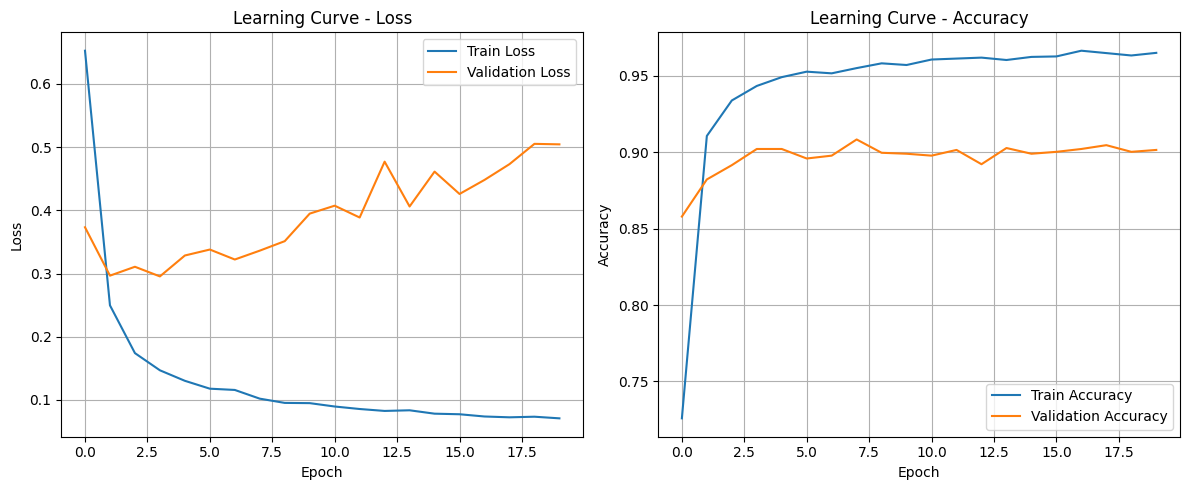

In [89]:
# Ambil history
history = hist.history

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##### Evaluasi Model

In [90]:
best_model = load_model("models/nn_amenities.h5")

y_pred_train_nn = best_model.predict(X_amenities_train)
y_pred_test_nn = best_model.predict(X_amenities_test)

# Konversi prediksi dari probabilitas ke label kelas
y_pred_train_labels = np.argmax(y_pred_train_nn, axis=1)
y_pred_test_labels = np.argmax(y_pred_test_nn, axis=1)

# Konversi label asli dari one-hot ke label kelas
Y_train_labels = np.argmax(Y_amenities_train_cat, axis=1)
Y_test_labels = np.argmax(Y_amenities_test_cat, axis=1)

# Hitung akurasi
accuracy_train_amenities_nn = accuracy_score(Y_train_labels, y_pred_train_labels)
accuracy_test_amenities_nn = accuracy_score(Y_test_labels, y_pred_test_labels)

201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [108]:
# Tampilkan akurasi
print(f"Neural Network - Train Accuracy: {accuracy_train_amenities_nn:.4f}")
print(f"Neural Network - Test Accuracy: {accuracy_test_amenities_nn:.4f}")

Neural Network - Train Accuracy: 0.9670
Neural Network - Test Accuracy: 0.9084


#### Access

In [92]:
model_access = Sequential([
    Dense(128, activation='relu', input_shape=(X_access_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_access.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Konfigurasi untuk Menyimpan Checkpoint Model Terbaik

In [93]:
checkpoint = ModelCheckpoint(
    'models/nn_access.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

##### Model Training

In [94]:
Y_access_train_cat = to_categorical(Y_access_train)
Y_access_test_cat = to_categorical(Y_access_test)

hist = model_access.fit(X_access_train, Y_access_train_cat, epochs=20, validation_data=(X_access_test, Y_access_test_cat), callbacks=[checkpoint])

Epoch 1/20
39/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5439 - loss: 1.0693 
Epoch 1: val_accuracy improved from -inf to 0.86298, saving model to models/nn_access.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5815 - loss: 1.0438 - val_accuracy: 0.8630 - val_loss: 0.5928
Epoch 2/20
46/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8951 - loss: 0.4039
Epoch 2: val_accuracy improved from 0.86298 to 0.92308, saving model to models/nn_access.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8976 - loss: 0.3910 - val_accuracy: 0.9231 - val_loss: 0.2345
Epoch 3/20
39/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9587 - loss: 0.1157
Epoch 3: val_accuracy improved from 0.92308 to 0.93990, saving model to models/nn_access.h5


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9577 - loss: 0.1198 - val_accuracy: 0.9399 - val_loss: 0.1843
Epoch 4/20
45/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9679 - loss: 0.0871
Epoch 4: val_accuracy did not improve from 0.93990
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9669 - loss: 0.0887 - val_accuracy: 0.9351 - val_loss: 0.2074
Epoch 5/20
43/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9645 - loss: 0.0840
Epoch 5: val_accuracy did not improve from 0.93990
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9650 - loss: 0.0842 - val_accuracy: 0.9303 - val_loss: 0.2151
Epoch 6/20
44/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9709 - loss: 0.0694
Epoch 6: val_accuracy did not improve from 0.93990
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9701 - loss: 0.0707 - val_accuracy: 0.9231 - val_loss: 0.2481
Epoch 7/20
46/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9657 - loss: 0.0739
Epoch 7: val_accuracy did not improve from 0.93990


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9773 - loss: 0.0538 - val_accuracy: 0.9423 - val_loss: 0.2256
Epoch 12/20
43/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.0633
Epoch 12: val_accuracy did not improve from 0.94231
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9694 - loss: 0.0633 - val_accuracy: 0.9399 - val_loss: 0.2248
Epoch 13/20
38/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9669 - loss: 0.0639
Epoch 13: val_accuracy did not improve from 0.94231
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9661 - loss: 0.0652 - val_accuracy: 0.9111 - val_loss: 0.2891
Epoch 14/20
40/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9644 - loss: 0.0718
Epoch 14: val_accuracy did not improve from 0.94231
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9660 - loss: 0.0699 - val_accuracy: 0.9231 - val_loss: 0.2812
Epoch 15/20
37/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9690 - loss: 0.0737
Epoch 15: val_accuracy did not improve from 

##### Learning Curve

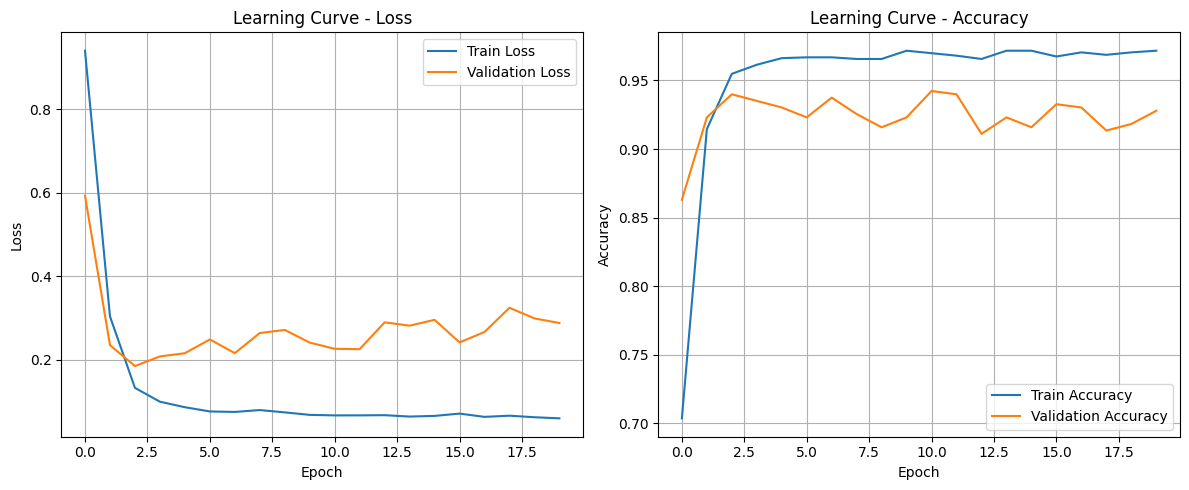

In [95]:
# Ambil history
history = hist.history

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##### Evaluasi Model

In [96]:
best_model = load_model("models/nn_access.h5")

y_pred_train_nn = best_model.predict(X_access_train)
y_pred_test_nn = best_model.predict(X_access_test)

# Konversi prediksi dari probabilitas ke label kelas
y_pred_train_labels = np.argmax(y_pred_train_nn, axis=1)
y_pred_test_labels = np.argmax(y_pred_test_nn, axis=1)

# Konversi label asli dari one-hot ke label kelas
Y_train_labels = np.argmax(Y_access_train_cat, axis=1)
Y_test_labels = np.argmax(Y_access_test_cat, axis=1)

# Hitung akurasi
accuracy_train_access_nn = accuracy_score(Y_train_labels, y_pred_train_labels)
accuracy_test_access_nn = accuracy_score(Y_test_labels, y_pred_test_labels)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [109]:
# Tampilkan akurasi
print(f"Neural Network - Train Accuracy: {accuracy_train_access_nn:.4f}")
print(f"Neural Network - Test Accuracy: {accuracy_test_access_nn:.4f}")

Neural Network - Train Accuracy: 0.9783
Neural Network - Test Accuracy: 0.9423


#### Price

In [97]:
model_price = Sequential([
    Dense(128, activation='relu', input_shape=(X_price_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_price.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Konfigurasi untuk Menyimpan Checkpoint Model Terbaik

In [98]:
checkpoint = ModelCheckpoint(
    'models/nn_price.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

##### Model Training

In [99]:
Y_price_train_cat = to_categorical(Y_price_train)
Y_price_test_cat = to_categorical(Y_price_test)

hist = model_price.fit(X_price_train, Y_price_train_cat, epochs=20, validation_data=(X_price_test, Y_price_test_cat), callbacks=[checkpoint])

Epoch 1/20
21/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4252 - loss: 1.0884   
Epoch 1: val_accuracy improved from -inf to 0.69401, saving model to models/nn_price.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4962 - loss: 1.0625 - val_accuracy: 0.6940 - val_loss: 0.7847
Epoch 2/20
24/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8521 - loss: 0.6223 
Epoch 2: val_accuracy improved from 0.69401 to 0.94006, saving model to models/nn_price.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8693 - loss: 0.5519 - val_accuracy: 0.9401 - val_loss: 0.2408
Epoch 3/20
26/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9621 - loss: 0.1364 
Epoch 3: val_accuracy did not improve from 0.94006
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9579 - loss: 0.1397 - val_accuracy: 0.9369 - val_loss: 0.2187
Epoch 4/20
25/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9566 - loss: 0.1182 
Epoch 4: val_accuracy did not improve from 0.94006
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9554 - loss: 0.1178 - val_accuracy: 0.9306 - val_loss: 0.2021
Epoch 5/20
25/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9620 - loss: 0.0797 
Epoch 5: val_accuracy improved from 0.94006 to 0.94637, saving model to models/nn_price.h5


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9576 - loss: 0.0907 - val_accuracy: 0.9464 - val_loss: 0.1901
Epoch 6/20
25/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9660 - loss: 0.0764 
Epoch 6: val_accuracy did not improve from 0.94637
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9627 - loss: 0.0832 - val_accuracy: 0.9401 - val_loss: 0.1998
Epoch 7/20
25/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9683 - loss: 0.0747 
Epoch 7: val_accuracy did not improve from 0.94637
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9648 - loss: 0.0815 - val_accuracy: 0.9306 - val_loss: 0.2061
Epoch 8/20
24/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.0780 
Epoch 8: val_accuracy did not improve from 0.94637
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9679 - loss: 0.0819 - val_accuracy: 0.9243 - val_loss: 0.2260
Epoch 9/20
25/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9612 - loss: 0.0748 
Epoch 9: val_accuracy did not improve from 0.94

##### Learning Curve

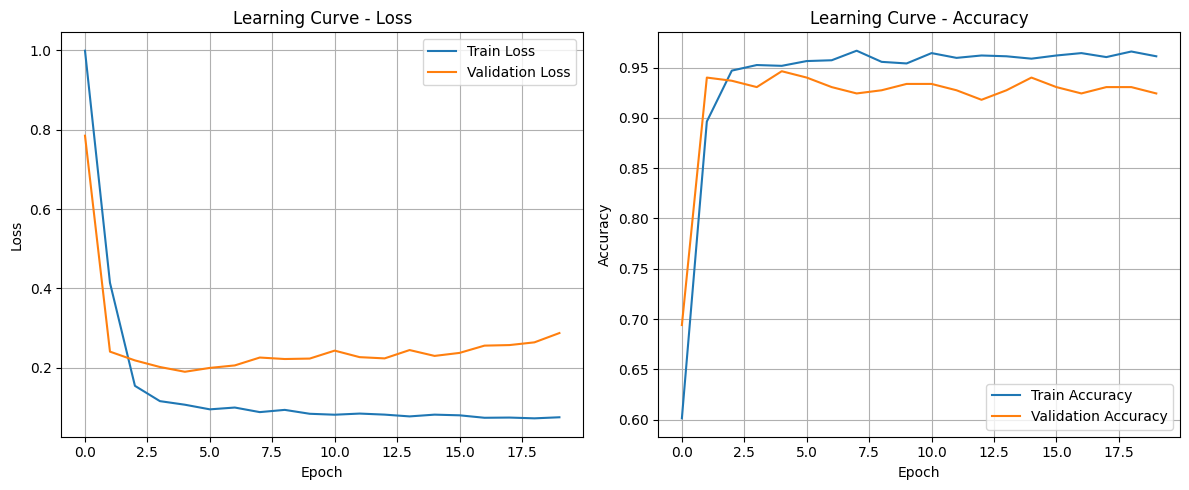

In [100]:
# Ambil history
history = hist.history

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##### Evaluasi Model

In [101]:
best_model = load_model("models/nn_price.h5")

y_pred_train_nn = best_model.predict(X_price_train)
y_pred_test_nn = best_model.predict(X_price_test)

# Konversi prediksi dari probabilitas ke label kelas
y_pred_train_labels = np.argmax(y_pred_train_nn, axis=1)
y_pred_test_labels = np.argmax(y_pred_test_nn, axis=1)

# Konversi label asli dari one-hot ke label kelas
Y_train_labels = np.argmax(Y_price_train_cat, axis=1)
Y_test_labels = np.argmax(Y_price_test_cat, axis=1)

# Hitung akurasi
accuracy_train_price_nn = accuracy_score(Y_train_labels, y_pred_train_labels)
accuracy_test_price_nn = accuracy_score(Y_test_labels, y_pred_test_labels)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [110]:
# Tampilkan akurasi
print(f"Neural Network - Train Accuracy: {accuracy_train_price_nn:.4f}")
print(f"Neural Network - Test Accuracy: {accuracy_test_price_nn:.4f}")

Neural Network - Train Accuracy: 0.9676
Neural Network - Test Accuracy: 0.9464


#### No Aspect

In [102]:
model_no_aspect = Sequential([
    Dense(128, activation='relu', input_shape=(X_no_aspect_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_no_aspect.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\hp14s\anaconda3\envs\main-ds\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### Konfigurasi untuk Menyimpan Checkpoint Model Terbaik

In [103]:
checkpoint = ModelCheckpoint(
    'models/nn_no_aspect.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

##### Model Training

In [104]:
Y_no_aspect_train_cat = to_categorical(Y_no_aspect_train)
Y_no_aspect_test_cat = to_categorical(Y_no_aspect_test)

hist = model_no_aspect.fit(X_no_aspect_train, Y_no_aspect_train_cat, epochs=20, validation_data=(X_no_aspect_test, Y_no_aspect_test_cat), callbacks=[checkpoint])

Epoch 1/20
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5583 - loss: 0.9692
Epoch 1: val_accuracy improved from -inf to 0.79268, saving model to models/nn_no_aspect.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5644 - loss: 0.9577 - val_accuracy: 0.7927 - val_loss: 0.4716
Epoch 2/20
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8852 - loss: 0.3234
Epoch 2: val_accuracy improved from 0.79268 to 0.79776, saving model to models/nn_no_aspect.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8849 - loss: 0.3236 - val_accuracy: 0.7978 - val_loss: 0.4599
Epoch 3/20
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9249 - loss: 0.2045
Epoch 3: val_accuracy improved from 0.79776 to 0.80386, saving model to models/nn_no_aspect.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9248 - loss: 0.2047 - val_accuracy: 0.8039 - val_loss: 0.4889
Epoch 4/20
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9400 - loss: 0.1562
Epoch 4: val_accuracy improved from 0.80386 to 0.80488, saving model to models/nn_no_aspect.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9398 - loss: 0.1566 - val_accuracy: 0.8049 - val_loss: 0.5696
Epoch 5/20
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9521 - loss: 0.1211
Epoch 5: val_accuracy did not improve from 0.80488
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9507 - loss: 0.1230 - val_accuracy: 0.7998 - val_loss: 0.5995
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9588 - loss: 0.1042
Epoch 6: val_accuracy did not improve from 0.80488
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9587 - loss: 0.1045 - val_accuracy: 0.7947 - val_loss: 0.6376
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9499 - loss: 0.1122
Epoch 7: val_accuracy improved from 0.80488 to 0.80691, saving model to models/nn_no_aspect.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9498 - loss: 0.1122 - val_accuracy: 0.8069 - val_loss: 0.6387
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9484 - loss: 0.1015
Epoch 8: val_accuracy did not improve from 0.80691
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9483 - loss: 0.1016 - val_accuracy: 0.7947 - val_loss: 0.7272
Epoch 9/20
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9601 - loss: 0.0859
Epoch 9: val_accuracy did not improve from 0.80691
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9589 - loss: 0.0872 - val_accuracy: 0.8049 - val_loss: 0.7498
Epoch 10/20
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9630 - loss: 0.0756
Epoch 10: val_accuracy did not improve from 0.80691
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9627 - loss: 0.0760 - val_accuracy: 0.7947 - val_loss: 0.7417
Epoch 11/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9624 - loss: 0.0795
Epoch 11: val_accuracy did not i

##### Learning Curve

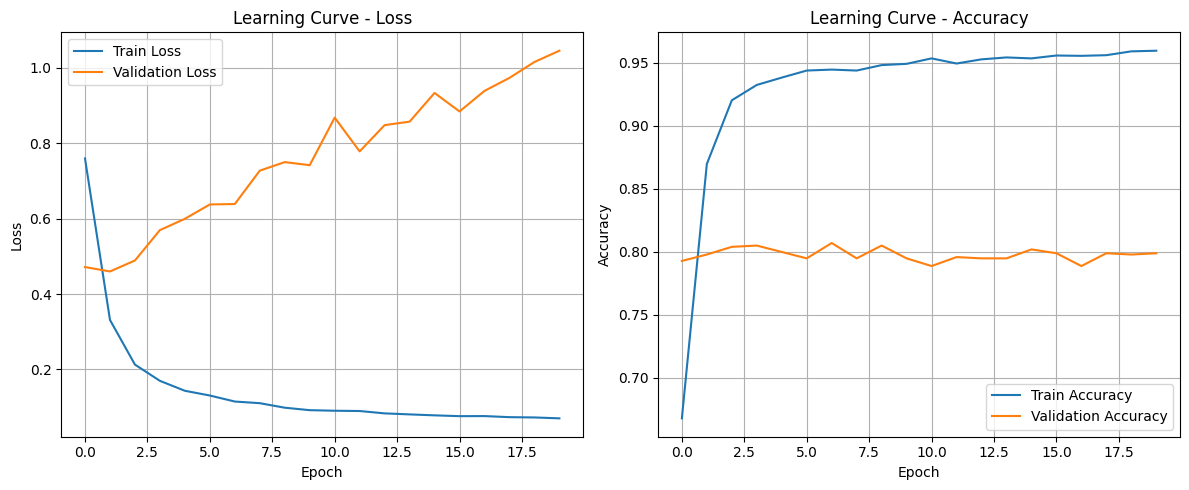

In [105]:
# Ambil history
history = hist.history

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

##### Evaluasi Model

In [106]:
best_model = load_model("models/nn_no_aspect.h5")

y_pred_train_nn = best_model.predict(X_no_aspect_train)
y_pred_test_nn = best_model.predict(X_no_aspect_test)

# Konversi prediksi dari probabilitas ke label kelas
y_pred_train_labels = np.argmax(y_pred_train_nn, axis=1)
y_pred_test_labels = np.argmax(y_pred_test_nn, axis=1)

# Konversi label asli dari one-hot ke label kelas
Y_train_labels = np.argmax(Y_no_aspect_train_cat, axis=1)
Y_test_labels = np.argmax(Y_no_aspect_test_cat, axis=1)

# Hitung akurasi
accuracy_train_no_aspect_nn = accuracy_score(Y_train_labels, y_pred_train_labels)
accuracy_test_no_aspect_nn = accuracy_score(Y_test_labels, y_pred_test_labels)

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [111]:
# Tampilkan akurasi
print(f"Neural Network - Train Accuracy: {accuracy_train_no_aspect_nn:.4f}")
print(f"Neural Network - Test Accuracy: {accuracy_test_no_aspect_nn:.4f}")

Neural Network - Train Accuracy: 0.9591
Neural Network - Test Accuracy: 0.8069
